In [21]:
import random
from libs.node import Node
from libs.node import Station
from libs.node import StationDcf
from libs.node import StationRl
from libs.channel import Channel
from tqdm import tqdm
from config import Config
import matplotlib.pyplot as plt

In [22]:
cfg = Config()
global_time = 0
channel = Channel(global_time, [])

station_num = 1
data_rate = 6 #Mbps
#All the lengeth is a mutible of slot

#incule header
pkt_len = 1560
#us
slot_len = 10
sifs = 2
ack_len = 2 + sifs
difs = 4
timeout = ack_len

frame_len = pkt_len * 8 / slot_len / data_rate
stations_list = []
total_time = 0

for i in range(station_num):
    if cfg.stationType == "Dcf":
        station = StationDcf(i, frame_len, channel, global_time, i, timeout, ack_len, difs, sifs)
    elif cfg.stationType == "RL":
        station = StationRl(i, frame_len, channel, global_time, i, timeout, ack_len)
    stations_list.append(station)

In [23]:
for i in tqdm(range(1000)):
    for station in stations_list:
        station.simulate(global_time)
    global_time = global_time + 1
    channel.update_state(global_time)

    if cfg.shuffleStationList:
        random.shuffle(stations_list)

for station in stations_list:
    total_time += station.total_pkt_time
print("==> total_time:", total_time)
total_time_channel = 0
for i in range(len(channel.start)):
    if(i > 0):
        if ((channel.start[i] - channel.start[i-1]) < frame_len):
            continue
    if(i < (len(channel.start)-1)):
        if ((channel.start[i + 1] - channel.start[i]) < frame_len):
            continue
    total_time_channel += frame_len
print("==> total_time_channel:", total_time_channel)
print("==> channel time:", channel.time)
throughput = total_time/channel.time * data_rate * 1500 / 1560
print("==> throughput:", throughput)

100%|██████████████████████████████████████████████████████████████████████████| 1000/1000 [00:00<00:00, 143498.03it/s]

step in send 0 0
after in send 0 212.0
step in send 212.0 212.0
after in send 212.0 424.0
step in send 425.0 424.0
after in send 425.0 637.0
step in send 639.0 637.0
after in send 639.0 851.0
step in send 851.0 851.0
after in send 851.0 1063.0
==> total_time: 1040.0
==> total_time_channel: 1040.0
==> channel time: 1063.0
==> throughput: 5.644402634054563


[0, 208]
[0, 0]
[212, 420]
[0, 0]
[425, 633]
[0, 0]
[639, 847]
[0, 0]
[851, 1059]
[0, 0]


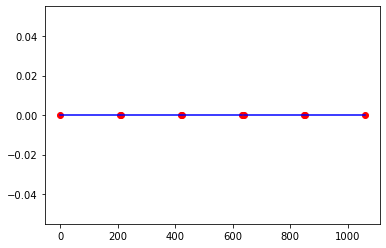

In [24]:
for i in range(len(channel.start)):
    x=[channel.start[i], channel.end[i]]
    print(x)
    y= [channel.operator[i], channel.operator[i]]
    print(y)
    plt.plot(x, y, color='b')
    plt.scatter(x, y, color='r')

[0, 208]
[0, 0]
[212, 420]
[0, 0]
[425, 633]
[0, 0]
[639, 847]
[0, 0]
[851, 1059]
[0, 0]


IndexError: list index out of range

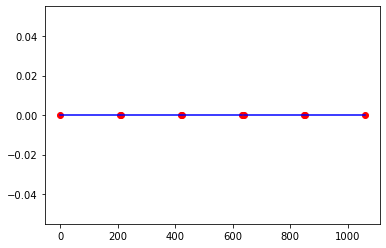

In [25]:
for i in range(10):
    x=[channel.start[i], channel.end[i]]
    print(x)
    y= [channel.operator[i], channel.operator[i]]
    print(y)
    plt.plot(x, y, color='b')
    plt.scatter(x, y, color='r')